<a href="https://colab.research.google.com/github/juangama/Curso.Prep.Henry/blob/master/netwoks_analisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import pandas as pd

phases = {}
G = {}
num_nodes_edges = {}

for i in range(1, 12):
    var_name = "phase" + str(i)
    file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
    phases[i] = pd.read_csv(file_name, index_col=["players"])
    phases[i].columns = "n" + phases[i].columns
    phases[i].index = phases[i].columns
    phases[i][phases[i] > 0] = 1
    G[i] = nx.from_pandas_adjacency(phases[i])
    G[i].name = var_name

for phase_number in [2, 6, 10]:
    num_nodes = len(G[phase_number].nodes())
    num_edges = len(G[phase_number].edges())
    num_nodes_edges[phase_number] = (num_nodes, num_edges)

print("Phase\tNumber of nodes\tNumber of edges")
for phase, (nodes, edges) in num_nodes_edges.items():
    print(f"{phase}\t{nodes}\t{edges}")


Phase	Number of nodes	Number of edges
2	24	28
6	27	47
10	42	50


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.42.2-6).
libgraphviz-dev is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


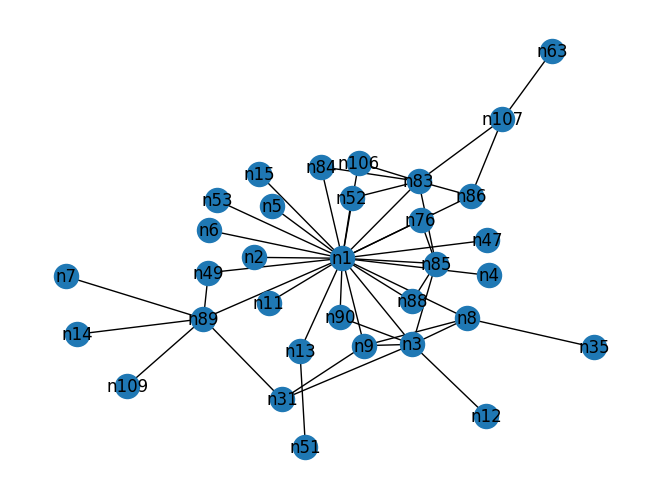

In [8]:
import matplotlib.pyplot as plt
!apt-get install graphviz graphviz-dev
!pip install pygraphviz
# Assuming you have already created G dictionary with phase graphs
phase_number = 4
g = G[phase_number]

# Visualize the graph using the Graphviz layout
pos = nx.drawing.nx_agraph.graphviz_layout(g)
nx.draw(g, pos, with_labels=True)
plt.show()

In [4]:

# Assuming you have already created G dictionary with phase graphs
phase_3 = 3
phase_9 = 9

players = ['n1', 'n3', 'n12', 'n83']

degree_centrality_data = {}

for player in players:
    degree_centrality_data[player] = {
        phase_3: nx.degree_centrality(G[phase_3])[player],
        phase_9: nx.degree_centrality(G[phase_9])[player]
    }

print("Player\tPhase 3\tPhase 9")
for player in players:
    phase_3_value = degree_centrality_data[player][phase_3]
    phase_9_value = degree_centrality_data[player][phase_9]
    print(f"{player}\t{phase_3_value:.3f}\t{phase_9_value:.3f}")



Player	Phase 3	Phase 9
n1	0.844	0.303
n3	0.281	0.333
n12	0.062	0.242
n83	0.250	0.030


In [5]:
# Assuming you have already created G dictionary with phase graphs
phase_3 = 3
phase_9 = 9

players = ['n1', 'n3', 'n12', 'n83']

betweenness_centrality_data = {}

for player in players:
    betweenness_centrality_data[player] = {
        phase_3: nx.betweenness_centrality(G[phase_3], normalized=True)[player],
        phase_9: nx.betweenness_centrality(G[phase_9], normalized=True)[player]
    }

print("Player\tPhase 3\tPhase 9")
for player in players:
    phase_3_value = betweenness_centrality_data[player][phase_3]
    phase_9_value = betweenness_centrality_data[player][phase_9]
    print(f"{player}\t{phase_3_value:.3f}\t{phase_9_value:.3f}")

Player	Phase 3	Phase 9
n1	0.830	0.249
n3	0.095	0.576
n12	0.000	0.357
n83	0.047	0.000


In [6]:
# Assuming you have already created G dictionary with phase graphs
phase_3 = 3
phase_9 = 9

players = ['n1', 'n3', 'n12', 'n83']

eigenvector_centrality_data = {}

for player in players:
    eigenvector_centrality_data[player] = {
        phase_3: nx.eigenvector_centrality(G[phase_3], max_iter=1000)[player],
        phase_9: nx.eigenvector_centrality(G[phase_9], max_iter=1000)[player]
    }

print("Player\tPhase 3\tPhase 9")
for player in players:
    phase_3_value = eigenvector_centrality_data[player][phase_3]
    phase_9_value = eigenvector_centrality_data[player][phase_9]
    print(f"{player}\t{phase_3_value:.3f}\t{phase_9_value:.3f}")

Player	Phase 3	Phase 9
n1	0.594	0.459
n3	0.291	0.468
n12	0.136	0.141
n83	0.277	0.092


In [7]:

# Assuming you have already created G dictionary with phase graphs
num_phases = 11

players = ['n1', 'n3', 'n12', 'n83']  # List of players under investigation

# Initialize dictionaries to store centrality values for each player
betweenness_centrality_means = {}
eigenvector_centrality_means = {}

for player in players:
    betweenness_centrality_sum = 0.0
    eigenvector_centrality_sum = 0.0
    num_phases_present = 0

    for phase in range(1, num_phases + 1):
        if player in G[phase]:
            # Calculate and accumulate centrality values
            betweenness_centrality_sum += nx.betweenness_centrality(G[phase], normalized=True)[player]
            eigenvector_centrality_sum += nx.eigenvector_centrality(G[phase], max_iter=1000)[player]
            num_phases_present += 1

    # Calculate mean centrality
    betweenness_centrality_mean = betweenness_centrality_sum / num_phases_present if num_phases_present > 0 else 0
    eigenvector_centrality_mean = eigenvector_centrality_sum / num_phases_present if num_phases_present > 0 else 0

    betweenness_centrality_means[player] = betweenness_centrality_mean
    eigenvector_centrality_means[player] = eigenvector_centrality_mean

# Find the top three players with the highest mean betweenness centrality
top_three_betweenness_players = sorted(betweenness_centrality_means, key=betweenness_centrality_means.get, reverse=True)[:3]

# Find the top three players with the highest mean eigenvector centrality
top_three_eigenvector_players = sorted(eigenvector_centrality_means, key=eigenvector_centrality_means.get, reverse=True)[:3]

# Print the results
print("Top three players with the highest mean Betweenness Centrality:")
for i, player in enumerate(top_three_betweenness_players, 1):
    print(f"{i}nd highest: {player}")

print("\nTop three players with the highest mean Eigenvector Centrality:")
for i, player in enumerate(top_three_eigenvector_players, 1):
    print(f"{i}nd highest: {player}")

Top three players with the highest mean Betweenness Centrality:
1nd highest: n1
2nd highest: n12
3nd highest: n3

Top three players with the highest mean Eigenvector Centrality:
1nd highest: n1
2nd highest: n3
3nd highest: n12
